In [2]:
# encoding: utf-8
# Author: Zhuangwei Kang

import os, sys
import matplotlib.pyplot as plt
from matplotlib import style
sys.path.append('../../')
from datapsr import *
import numpy as np
style.use(['classic'])
plt.rc('axes', axisbelow=True)
dpi=600

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.ymargin'] = 0.1

In [3]:
belat = []
belat_std = []

plugins = ['hostmode', 'flannel-vxlan', 'flannel-hostgw', 'kube-router', 'weavenet']
data_len = [64, 256, 1024, 4096, 16384]
_, perf = load_data(range(len(data_len)), plugins, latencyTest=True)
labels = ['Host-mode', 'Flannel-vxlan', 'Flannel-hostgw', 'Kube-router', 'WeaveNet']
for i, cni in enumerate(plugins):
    latency = perf[perf['cni'] == cni]['90%'].to_numpy()
    latency_std = perf[perf['cni'] == cni]['std'].to_numpy()
    belat.append(latency)
    belat_std.append(latency_std)

In [20]:
# latency test for BestEffort and Reliable

relat = np.array([[690.0, 749.0, 959.0, 1369.0, 2417.0],
[961.0, 1032.0, 1234.0, 1720.0, 3284.0],
[804.0, 863.0, 1085.0, 1627.0, 3087.0],
[783.0, 843.0, 1053.0, 1630.0, 3149.0],
[1050.0, 1114.0, 1329.0, 1822.0, 3417.0]])

relat_std = np.array([[194.5, 226.7, 229.0, 281.9, 354.6],
[258.6, 243.0, 279.6, 293.7, 295.9],
[207.4, 226.3, 240.6, 327.8, 323.7],
[217.7, 219.7, 268.9, 289.9, 335.9],
[279.5, 261.2, 286.8, 305.8, 328.0]])

oh = pd.DataFrame(relat - belat)
oh.columns = data_len
oh.index = labels
print(oh)
relat = 100*(relat - belat)/relat
relat_std = 100*(relat_std - belat_std)/relat_std

                64     256    1024   4096   16384
Host-mode        74.0   76.0   78.0   81.0   46.0
Flannel-vxlan   111.0  117.0  111.0   68.0  101.0
Flannel-hostgw   83.0   75.0   90.0   66.0   38.0
Kube-router      73.0   66.0   67.0   52.0   30.0
WeaveNet         89.0   99.0  109.0   51.0  102.0


ipykernel_launcher:36: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


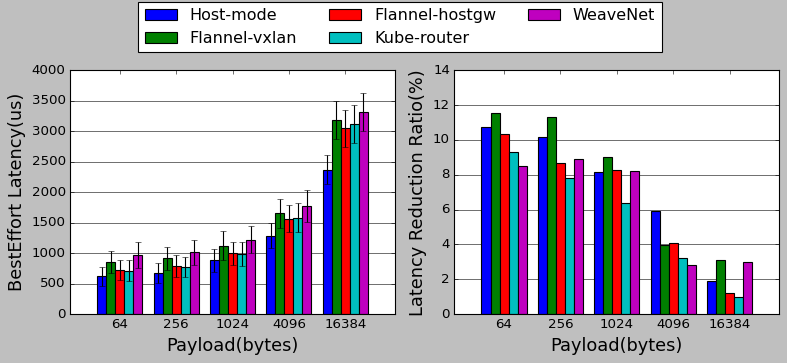

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
bars = []

def helper(i, j, data, err, xlabel, ylabel, title=None, plot_type=None):
    global ax, bars
    x = np.arange(len(data_len))
    if plot_type == 'bar':
        total_width, n = 0.8, len(plugins)
        width = total_width / n
        x = x - (total_width - width) / 2
        if err is not None:
            ax[j].bar(x+i*width, data[i], width=width, yerr=err[i])
        else:
            ax[j].bar(x+i*width, data[i], width=width)
        ax[j].grid(linestyle='-', axis='y')
    else:
        ax[j].plot(data[i])
        ax[j].grid(linestyle='-')
    ax[j].set_ylabel(ylabel, fontsize=16)
    ax[j].set_xlabel(xlabel, fontsize=16)
    ax[j].set_title(title, fontsize=16)
    bars.append(ax[j])

plt.xticks(np.arange(len(data_len)), data_len)

for j in range(5):
    helper(j, 0, belat, belat_std, 'Payload(bytes)', 'BestEffort Latency(us)', plot_type='bar')
for j in range(5):
    helper(j, 1, relat, None, 'Payload(bytes)', 'Latency Reduction Ratio(%)', plot_type='bar')

fig.legend(bars[:5],     # The line objects
           labels=labels,   # The labels for each line
           loc="center",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           bbox_to_anchor=(0.5, 1.05),
           ncol=3
           )
plt.tight_layout()
plt.savefig('besteffort.png', dpi=600, bbox_inches='tight')

In [22]:
pub_rate_lat = []
pub_rate_lat_std = []

plugins = ['hostmode','flannel-vxlan', 'flannel-hostgw', 'kube-router', 'weavenet']
data_len2 = [1024]
num_rates = 7
_, perf = load_data(range(num_rates), plugins)
labels = ['Host-mode', 'Flannel-vxlan', 'Flannel-hostgw', 'Kube-router', 'WeaveNet']
pub_rate = [1000*(i) for i in range(num_rates)]
pub_rate[0] = 500
plt.xticks(np.arange(num_rates), pub_rate)

markers = ['D', 'o', '*', 'P', 's']
x = np.arange(len(pub_rate))
total_width, n = 0.8, len(plugins)
width = total_width / n
x = x - (total_width - width) / 2
for i, cni in enumerate(plugins):
    latency = perf[perf['cni'] == cni]['50%'].to_numpy()
    latency_std = perf[perf['cni'] == cni]['std'].to_numpy()
    # plt.bar(x+i*width, latency, yerr=latency_std, width=width, label=labels[i])
    plt.plot(latency, label=labels[i],  marker='D', markersize=10, color='C%d' % i)
    # plt.fill_between(x, latency-latency_std, latency+latency_std, alpha=0.2, color='C%d' % i)

plt.xlabel('Publication Rate(samples/s)', fontsize=16)
plt.ylabel('50th Loaded Latency(us)', fontsize=16)
plt.legend(fontsize=16, 
           loc="right", 
           borderaxespad=0.1,
           numpoints=1, 
           bbox_to_anchor=(1.42, 0.5),
           ncol=1)
plt.grid(linestyle='-')
plt.savefig('loadlatency.png', dpi=600, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: './/throughputTest/hostmode/test-6/'

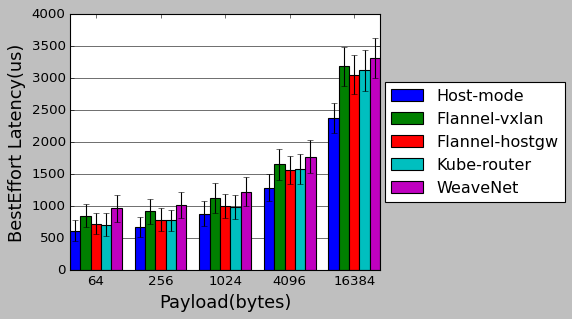

In [41]:

x = np.arange(len(data_len))
total_width, n = 0.8, len(plugins)
width = total_width / n
x = x - (total_width - width) / 2

fig = plt.figure(figsize=(5, 4))
plt.xticks(np.arange(len(data_len)), data_len)
for i, plugin in enumerate(plugins):
    plt.bar(x+i*width, belat[i], yerr=belat_std[i], width=width, label=labels[i])
plt.xlabel('Payload(bytes)', fontsize=16)
plt.ylabel('BestEffort Latency(us)', fontsize=16)
plt.legend(labels=labels,   # The labels for each line
           loc="right", 
           borderaxespad=0.1,
           bbox_to_anchor=(1.6, .5),
           ncol=1
           )
plt.grid(linestyle='-', axis='y')
# plt.tight_layout()
plt.savefig('besteffort.png', dpi=600, bbox_inches='tight')

      cpu  lost  mbps(ave)  packets/s(ave)   packets  length  test  \
0    1.69  0.00        4.0           491.0   58956.0  1024.0     0   
1    2.68  0.00        8.0           980.0  117719.0  1024.0     1   
2    4.49  0.00       16.1          1961.0  235361.0  1024.0     2   
3    5.70  0.00       24.0          2933.0  352036.0  1024.0     3   
4    7.04  0.00       31.8          3878.0  465465.0  1024.0     4   
5    8.43  0.00       39.8          4861.0  583366.0  1024.0     5   
6    9.58  0.00       48.2          5885.0  706288.0  1024.0     6   
7    1.74  0.00        4.0           487.0   58548.0  1024.0     0   
8    2.79  0.00        7.9           970.0  116406.0  1024.0     1   
9    4.34  0.00       15.8          1925.0  231024.0  1024.0     2   
10   5.63  0.00       23.5          2869.0  344375.0  1024.0     3   
11   6.72  0.00       31.4          3838.0  460669.0  1024.0     4   
12  12.27  0.01       48.0          5859.0  703132.0  1024.0     5   
13  12.27  0.03     

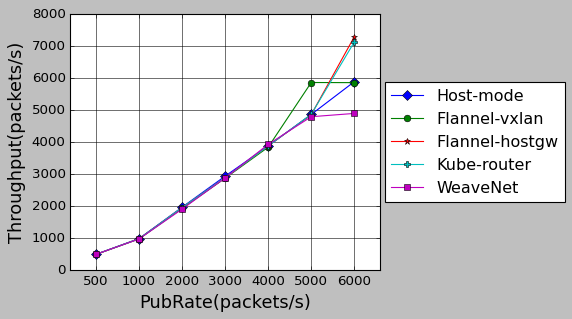

In [34]:
records = []

plugins = ['hostmode', 'flannel-vxlan', 'flannel-hostgw', 'kube-router', 'weavenet']
x_vals = [500,1000, 2000, 3000, 4000, 5000, 6000]
# x_vals = data_len
perf, latency_std = load_data(range(len(x_vals)), plugins)
print(perf)
labels = ['Host-mode', 'Flannel-vxlan', 'Flannel-hostgw', 'Kube-router', 'WeaveNet']
for i, cni in enumerate(plugins):
    throughput = perf[perf['cni'] == cni]['packets/s(ave)'].to_numpy()
    # print(throughput)
    records.append(throughput)
    # latency_std = perf[perf['cni'] == cni]['std'].to_numpy()

markers = ['D', 'o', '*', 'P', 's']
x = np.arange(len(x_vals))
# total_width, n = 0.8, len(plugins)
# width = total_width / n
# x = x - (total_width - width) / 2

fig = plt.figure(figsize=(5, 4))
plt.xticks(np.arange(len(pub_rates)), x_vals)
for i, plugin in enumerate(plugins):
    if i == 0: pass
    plt.plot(x, records[i], label=labels[i], marker=markers[i])
plt.xlabel('PubRate(packets/s)', fontsize=16)
plt.ylabel('Throughput(packets/s)', fontsize=16)
plt.legend(labels=labels,   # The labels for each line
           loc="right", 
           borderaxespad=0.1,
           bbox_to_anchor=(1.6, .5),
           numpoints=1,
           ncol=1
           )
plt.ylim(0)
plt.grid(linestyle='-')
# plt.tight_layout()
plt.savefig('besteffort_throughput.png', dpi=600, bbox_inches='tight')

In [32]:
reliable_thp = np.array([[ 5.7, 22.5, 81.2, 93.1, 93.5],
[ 3.1, 12.5, 47.7, 85.3, 90.8],
[ 4.0,  16.1, 61.2, 92.8, 93.6],
[ 4.1, 16.1, 61.3, 92.8, 93.6],
[ 2.7, 10.9, 41.0,  78.7, 90.9]])

besteffort_thp = np.array([[ 7.0 , 26.2, 85.0,  94.4, 94.6],
[ 3.8, 16.9, 55.8, 51.7, 2.6],
[ 5.1, 19.2, 73.1 ,16.7, 3.1],
[ 5.3, 20.6, 77.0,  16.4, 3.3],
[ 3.2, 13.6, 50.8, 35.2, 3.0 ]])

imp = 100*(besteffort_thp - reliable_thp)/reliable_thp
print(imp.round(1))

[[ 22.8  16.4   4.7   1.4   1.2]
 [ 22.6  35.2  17.  -39.4 -97.1]
 [ 27.5  19.3  19.4 -82.  -96.7]
 [ 29.3  28.   25.6 -82.3 -96.5]
 [ 18.5  24.8  23.9 -55.3 -96.7]]
